In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'x':np.random.random(5), 'y':np.random.random(5)})
df

,x,y
0,0.188861,0.978780
1,0.932959,0.050275
2,0.964162,0.133918
3,0.827996,0.220689
4,0.403971,0.338667


In [3]:
# df.loc[10,['x','y']] = [7/16, .8]
df

,x,y
0,0.188861,0.978780
1,0.932959,0.050275
2,0.964162,0.133918
3,0.827996,0.220689
4,0.403971,0.338667


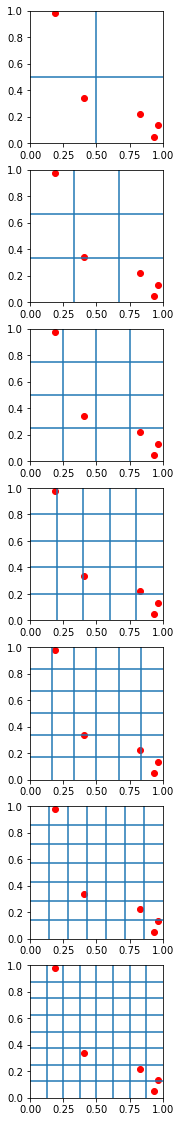

In [4]:
fig, axs = plt.subplots(7, figsize=(8,20))
for i, ax in enumerate(axs,1):
    ax.scatter(df['x'],df['y'], color='red')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_box_aspect(1)
    p = np.linspace(0,1,i+2)[1:-1]
    for pp in p:
        ax.axhline(pp)
        ax.axvline(pp)

In [5]:
df

,x,y
0,0.188861,0.978780
1,0.932959,0.050275
2,0.964162,0.133918
3,0.827996,0.220689
4,0.403971,0.338667


0: Increasing granularity to 5
1: Increasing granularity to 6
4: Increasing granularity to 7
6: Increasing granularity to 8
7: Increasing granularity to 9
10: Increasing granularity to 10
15: Increasing granularity to 11
18: Increasing granularity to 12
23: Increasing granularity to 13
25: Increasing granularity to 14
27: Increasing granularity to 15
30: Increasing granularity to 16
38: Increasing granularity to 17
46: Increasing granularity to 18
55: Increasing granularity to 19
63: Increasing granularity to 20
72: Increasing granularity to 21
79: Increasing granularity to 22
84: Increasing granularity to 23
94: Increasing granularity to 24


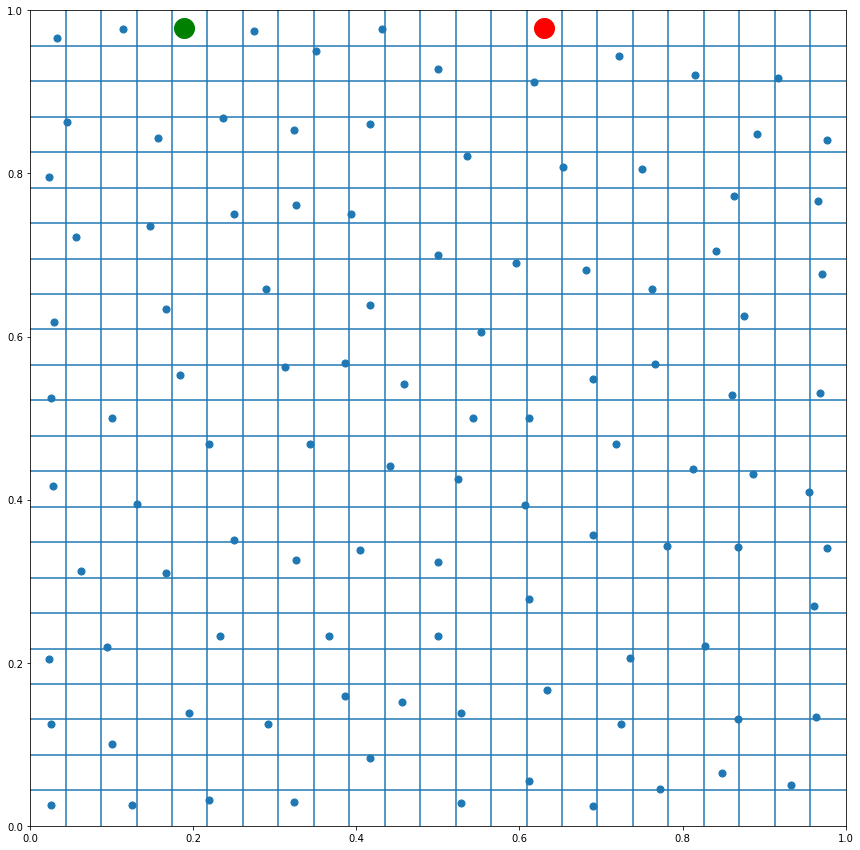

In [6]:
fig, axs = plt.subplots(1, figsize = (15,15))
b =4
i=0

# while i < 10*len(axs):
while True:

    bins = np.linspace(0,1,b)
    df['x_bin_index'] = np.digitize(df['x'], bins)-1
    df['y_bin_index'] = np.digitize(df['y'], bins)-1
    
#     df['x_bin'] = ((2*np.digitize(df['x'], bins)-1)/2)*(1/(b-1))
#     df['y_bin'] = ((2*np.digitize(df['y'], bins)-1)/2)*(1/(b-1))
    
    
    all_cells = set([(i,j) for i in range(b-1) for j in range(b-1)])
    occupied_cells = set([(x,y) for x,y in zip(df['x_bin_index'],df['y_bin_index'])])
    neighbors = set([(x+i,y+j) for x,y in list(occupied_cells) for i in range(-1,2) for j in range(-1,2)])
    vacant_cells = list(all_cells - neighbors)

    if len(vacant_cells) == 0:
        b+=1
        print(f'{i}: Increasing granularity to {b}')
        
        continue

    chosen_cell = vacant_cells[np.random.randint(0, len(vacant_cells))]
    chosen_x, chosen_y = [((2*i+1)/2)*(1/(b-1)) for i in chosen_cell]
    df = pd.concat([df, pd.DataFrame({'x':[chosen_x], 'y':[chosen_y]})]).reset_index(drop=True)
    if i==100:
        ax=axs

    
#         ax.plot(df['x'],df['y'])
        ax.scatter(df['x'].iloc[0], df['y'].iloc[0], s=400, color='green')
        ax.scatter(df['x'].iloc[1:-1], df['y'].iloc[1:-1], s=50)
        ax.scatter(df['x'].iloc[-1], df['y'].iloc[-1], s=400, color='red')
#         ax.scatter(df['x_bin'],df['y_bin'], s=200, alpha=.3)
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        ax.set_box_aspect(1)
        [(ax.axhline(i), ax.axvline(i)) for i in bins[1:-1]]
        break
    
    i+=1
#     print(df.shape)

In [7]:
df

,x,y,x_bin_index,y_bin_index
0,0.188861,0.978780,4.0,22.0
1,0.932959,0.050275,21.0,1.0
2,0.964162,0.133918,22.0,3.0
3,0.827996,0.220689,19.0,5.0
4,0.403971,0.338667,9.0,7.0
...,...,...,...,...
101,0.326087,0.760870,7.0,17.0
102,0.847826,0.065217,19.0,1.0
103,0.326087,0.326087,7.0,7.0
104,0.543478,0.500000,12.0,11.0


In [11]:
plt.xkcd()

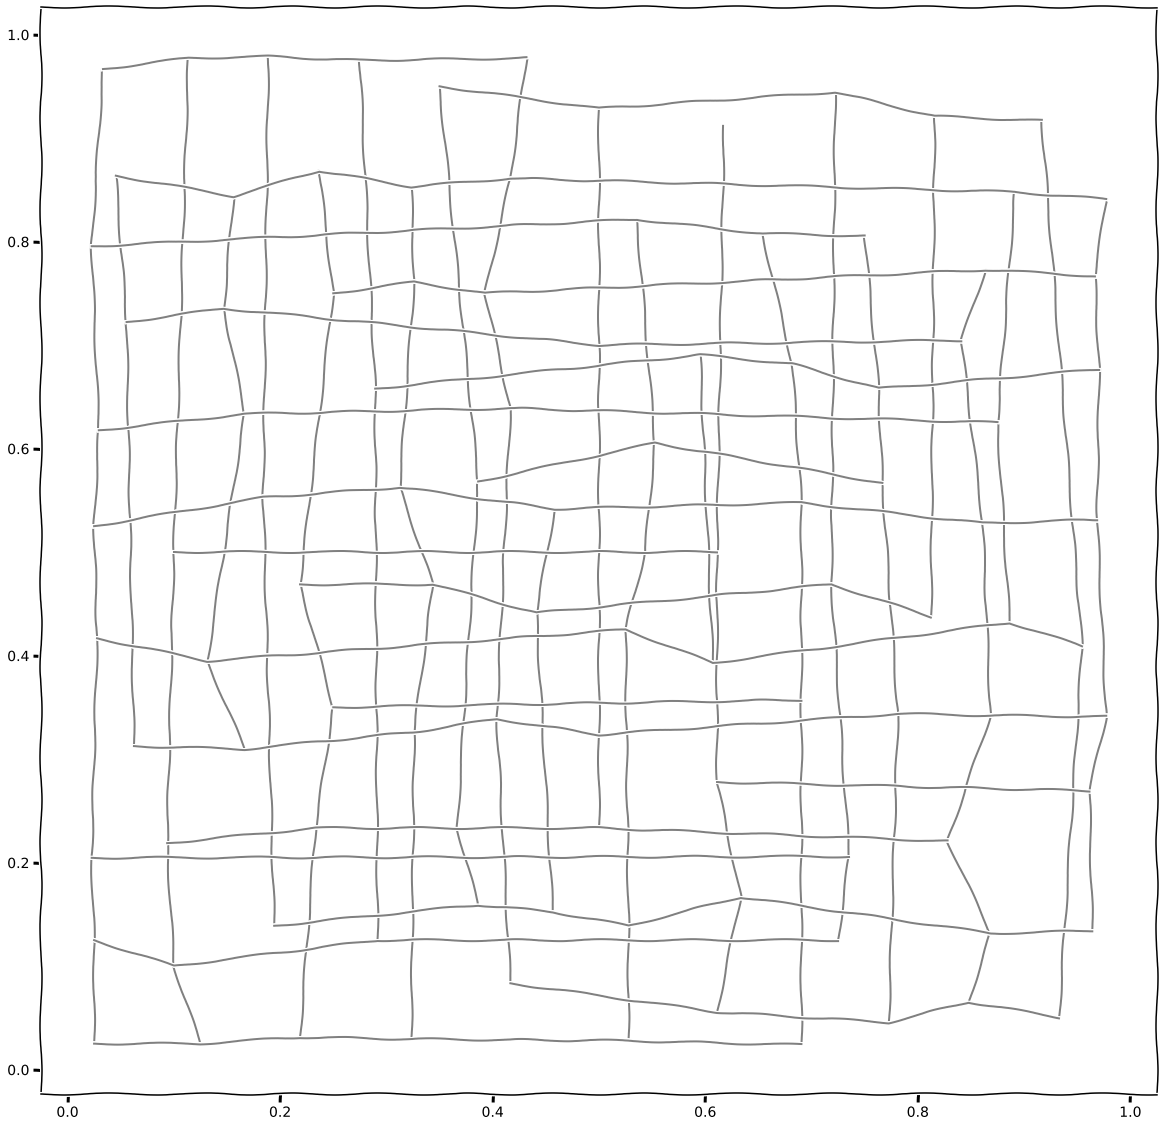

In [18]:
plt.figure(figsize=(20,20))
for i in df['x_bin_index']:
    points = df[df['x_bin_index']==i]
    points = points.sort_values('y')
#     print(points)
    plt.plot(points['x'], points['y'], color = 'grey')
    
for i in df['y_bin_index']:
    points = df[df['y_bin_index']==i]
    points = points.sort_values('x')
#     print(points)
    plt.plot(points['x'], points['y'], color = 'grey')
    
# plt.scatter(df['x'][:-1],df['y'][:-1])
    

In [9]:
1/0

ZeroDivisionError: division by zero

In [ ]:
plt.hist(df['x'], bins =1000)

In [ ]:
plt.hist(df['y'], bins = 1000)

In [ ]:
df

In [ ]:
b = 9
bins = np.linspace(0,1,b)
print(bins)
df['x_bin_index'] = np.digitize(df['x'], bins)-1
df['y_bin_index'] = np.digitize(df['y'], bins)-1


df['x_bin'] = ((2*np.digitize(df['x'], bins)-1)/2)*(1/(b-1))
df['y_bin'] = ((2*np.digitize(df['y'], bins)-1)/2)*(1/(b-1))


In [ ]:
plt.scatter(df['x'],df['y'], s=50)
plt.scatter(df['x_bin'],df['y_bin'], s=800, alpha=.3)
plt.axis('square')
[(plt.axhline(i), plt.axvline(i)) for i in bins[1:-1]]
plt.xlim([0,1])
plt.ylim([0,1]);

In [ ]:
df

In [ ]:
all_cells = set([(i,j) for i in range(b-1) for j in range(b-1)])
all_cells

In [ ]:
occupied_cells = set([(x,y) for x,y in zip(df['x_bin_index'],df['y_bin_index'])])
occupied_cells

In [ ]:
neighbors = set([(x+i,y+j) for x,y in list(occupied_cells) for i in range(-1,2) for j in range(-1,2)])
neighbors
                

In [ ]:
vacant_cells = list(all_cells - neighbors)
vacant_cells

In [ ]:
chosen_cell = vacant_cells[np.random.randint(0, len(vacant_cells))]

In [ ]:
chosen_cell

In [ ]:
chosen_x, chosen_y = [((2*i+1)/2)*(1/(b-1)) for i in chosen_cell]
chosen_x,chosen_y

In [ ]:
df = pd.concat([df, pd.DataFrame({'x':[chosen_x], 'y':[chosen_y]})]).reset_index(drop=True)